# KB카드 데이터

## Q 1. KB카드 데이터는 음식점 데이터이기 때문에 혹시 MZ세대 또는 MZ세대의 남자(또는 여자)가 선호하는 음식이 있지 않을까?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [21]:
kb = kb = pd.read_csv('c:\\data\\fin\\KB국민카드_금융빅데이터경진대회_데이터_raw2.csv')
kb.tail()

,기준년도,기준년월,한글시도명,한글시군구명,법정동리명,마케팅업종중분류명,마케팅업종세분류명,마케팅업종세세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
311620,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,4.50대,1,0,17,22,5
311621,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,4.50대,1,1,42,49,5
311622,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,5.60대,0,1,3,3,5
311623,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,5.60대,1,0,17,20,5
311624,2021,3,서울특별시,마포구,합정동,한식,면요리,국수/칼국수전문점,02.여성,5.60대,1,1,14,16,5


In [4]:
kb_e = kb.copy()

In [5]:
kb_e['성별구분'].replace({'02.여성':0, '01.남성':1}, inplace=True)

In [6]:
kb_e['연령대'] = kb_e['연령대'].map(lambda x: 1 if x in ['1.20대이하', '2.30대'] else 0)

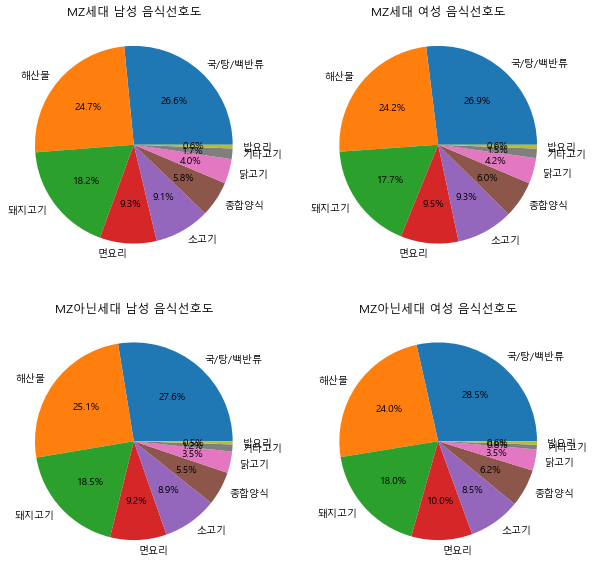

In [18]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.pie(kb_e['마케팅업종세분류명'][(kb_e['연령대']==1) & (kb_e['성별구분']==1)].value_counts(), labels=kb_e.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(kb_e['마케팅업종세분류명'][(kb_e['연령대']==1) & (kb_e['성별구분']==0)].value_counts(), labels=kb_e.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')
ax3.pie(kb_e['마케팅업종세분류명'][(kb_e['연령대']==0) & (kb_e['성별구분']==1)].value_counts(), labels=kb_e.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')
ax4.pie(kb_e['마케팅업종세분류명'][(kb_e['연령대']==0) & (kb_e['성별구분']==0)].value_counts(), labels=kb_e.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ세대 남성 음식선호도')
ax2.set_title('MZ세대 여성 음식선호도')
ax3.set_title('MZ아닌세대 남성 음식선호도')
ax4.set_title('MZ아닌세대 여성 음식선호도')

plt.show()

## A 1. 응 ㄴㄴ, 그런 것 없어~
## 신기하게도 세대별, 남녀별 음식 선호도 차이가 없다.

## Q 2. 혹시 MZ세대에게서 코로나 전과 후에 음식 선호도 차이가 있지 않을까?

In [20]:
kb_e['기준년도'].unique()

array([2019, 2020, 2021], dtype=int64)

In [24]:
df1 = kb_e[(kb_e['기준년도']==2019) | ((kb_e['기준년도']==2020) & (kb_e['기준년월']<7))]
df2 = kb_e[(kb_e['기준년도']==2021) | ((kb_e['기준년도']==2020) & (kb_e['기준년월']>=7))]

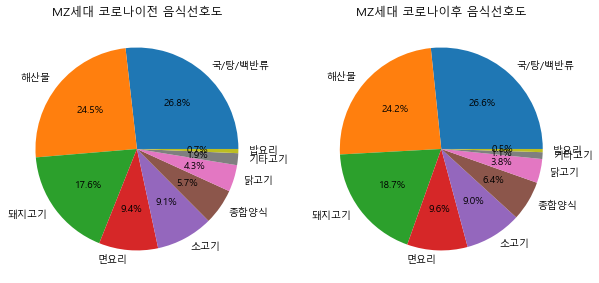

In [26]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(df1['마케팅업종세분류명'][kb_e['연령대']==1].value_counts(), labels=kb_e.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(df2['마케팅업종세분류명'][kb_e['연령대']==1].value_counts(), labels=kb_e.마케팅업종세분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ세대 코로나이전 음식선호도')
ax2.set_title('MZ세대 코로나이후 음식선호도')

plt.show()

## A2. 응 ㄴㄴ, 그딴 거 없어~
## MZ세대는 코로나 이전과 이후의 음식 선호도 차이가 없었다.

## Feature 1. MZ세대는 체크카드만 보유한 인원 비율이 다른세대보다 높다.

## Insight 1. MZ세대를 신용카드 잠재적 고객으로 추론하고, 회원수와 매출건수가 많은 사람중에 신용카드를 보유하지 않은 사람에게 신용카드 가입을 권유할 수 있으나, MZ 세대 만의 특징이라고 하기 어렵고, 이걸로 인사이트가 딱히 생각나지 않는다.

In [27]:
kb_e.describe()

,기준년도,기준년월,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
count,311625.00000,311625.00000,311625.00000,311625.00000,311625.00000,311625.00000,311625.00000,311625.00000,311625.00000
mean,2019.65510,6.36640,0.51631,0.41718,0.69850,0.66721,49.88884,62.50359,11.21135
std,0.65415,3.38039,0.49973,0.49309,0.45891,0.47121,124.10907,168.92511,9.24676
min,2019.00000,1.00000,0.00000,0.00000,0.00000,0.00000,3.00000,3.00000,1.00000
25%,2019.00000,3.00000,0.00000,0.00000,0.00000,0.00000,8.00000,10.00000,4.00000
50%,2020.00000,6.00000,1.00000,0.00000,1.00000,1.00000,19.00000,22.00000,9.00000
75%,2020.00000,9.00000,1.00000,1.00000,1.00000,1.00000,45.00000,54.00000,16.00000
max,2021.00000,12.00000,1.00000,1.00000,1.00000,1.00000,4739.00000,6403.00000,50.00000


In [30]:
kb_l = kb_e[(kb_e['회원수']>45) & (kb_e['매출건수']>54)]
kb_l.describe()

,기준년도,기준년월,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
count,73670.00000,73670.00000,73670.00000,73670.00000,73670.00000,73670.00000,73670.00000,73670.00000,73670.00000
mean,2019.58701,6.46150,0.59240,0.54797,0.75059,0.74846,157.80265,202.08625,6.78382
std,0.63701,3.30465,0.49139,0.49770,0.43267,0.43390,222.36852,307.44978,7.20486
min,2019.00000,1.00000,0.00000,0.00000,0.00000,0.00000,46.00000,55.00000,1.00000
25%,2019.00000,4.00000,0.00000,0.00000,1.00000,0.00000,64.00000,76.00000,2.00000
50%,2020.00000,6.00000,1.00000,1.00000,1.00000,1.00000,91.00000,112.00000,4.00000
75%,2020.00000,9.00000,1.00000,1.00000,1.00000,1.00000,161.00000,202.00000,9.00000
max,2021.00000,12.00000,1.00000,1.00000,1.00000,1.00000,4739.00000,6403.00000,46.00000


In [31]:
kb_ll = kb_l[(kb_l['회원수']>161) & (kb_l['매출건수']>202)]
kb_ll.describe()

,기준년도,기준년월,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
count,17211.00000,17211.00000,17211.00000,17211.00000,17211.00000,17211.00000,17211.00000,17211.00000,17211.00000
mean,2019.53797,6.50537,0.59619,0.67776,0.68636,0.82988,395.20766,522.86439,3.59880
std,0.62152,3.26122,0.49067,0.46735,0.46398,0.37575,367.01073,514.39394,4.61441
min,2019.00000,1.00000,0.00000,0.00000,0.00000,0.00000,162.00000,203.00000,1.00000
25%,2019.00000,4.00000,0.00000,0.00000,0.00000,1.00000,209.00000,264.00000,1.00000
50%,2019.00000,6.00000,1.00000,1.00000,1.00000,1.00000,274.00000,357.00000,2.00000
75%,2020.00000,9.00000,1.00000,1.00000,1.00000,1.00000,423.00000,559.00000,4.00000
max,2021.00000,12.00000,1.00000,1.00000,1.00000,1.00000,4739.00000,6403.00000,40.00000


In [32]:
kb_e[kb_e['회원수']==4739]

,기준년도,기준년월,한글시도명,한글시군구명,법정동리명,마케팅업종중분류명,마케팅업종세분류명,마케팅업종세세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
70195,2019,7,서울특별시,마포구,서교동,양식,종합양식,종합양식,0,1,0,1,4739,5661,2


In [33]:
kb_e[kb_e['매출건수']==6403]

,기준년도,기준년월,한글시도명,한글시군구명,법정동리명,마케팅업종중분류명,마케팅업종세분류명,마케팅업종세세분류명,성별구분,연령대,신용카드보유여부,체크카드보유여부,회원수,매출건수,순위
23290,2019,4,서울특별시,강남구,역삼동,한식,국/탕/백반류,일반한식/백반,1,1,1,1,3457,6403,1
